In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [9]:
dataset = randn(25)

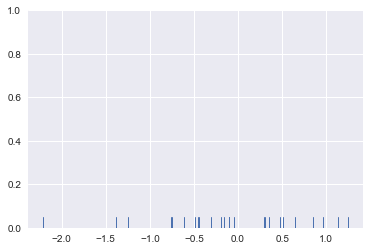

In [10]:
# Every tick is a value in the dataset
sns.rugplot(dataset)


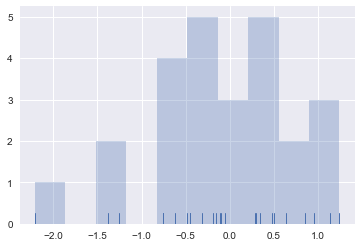

In [11]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

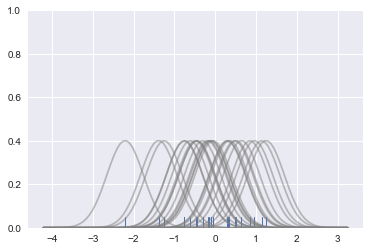

In [16]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4 * (dataset.std())**5) / (3*len(dataset)) )**0.2

# Create a list for the kernels

kernel_list = []

for data_point in dataset:
    # Create a kernel for each point and
    # append to kernel list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting 
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color = 'grey', alpha=0.5)
    
plt.ylim(0,1)    

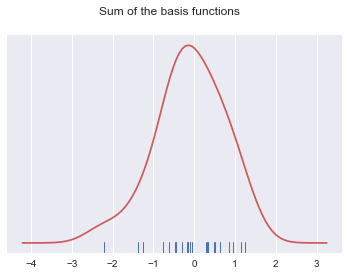

In [17]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle('Sum of the basis functions')

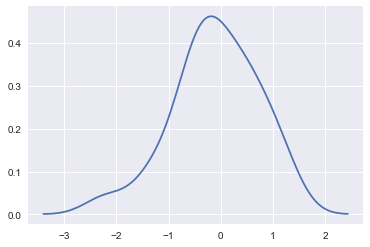

In [18]:
# All this can be done with seaborn

sns.kdeplot(dataset)

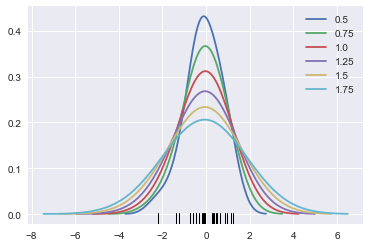

In [23]:
sns.rugplot(dataset, color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset, bw=bw, lw = 1.8,label=bw)

In [24]:
# Can choose different types of kernels

url = 'http://en.wikipedia.org/wiki/kernel_(statistics)'

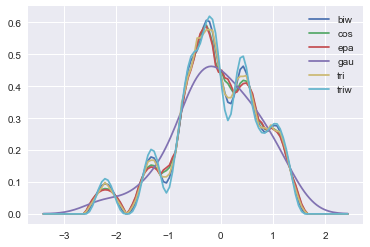

In [26]:
# Using different types of function for kernels

kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label = kern )

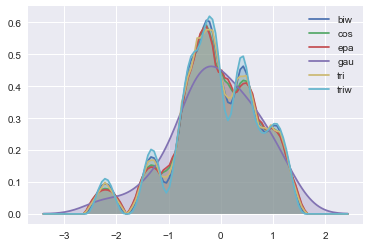

In [27]:
# We can also shade 
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label = kern, shade =True )

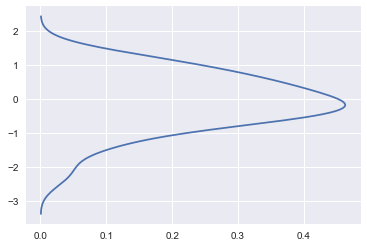

In [28]:
# We can also plot on vertical axis
sns.kdeplot(dataset, vertical =True)

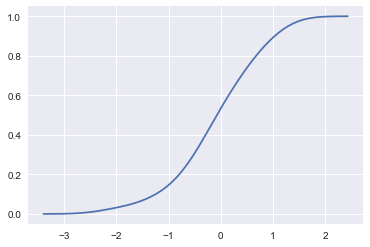

In [29]:
# We can use a kde plot to create a cdf

sns.kdeplot(dataset, cumulative=True)

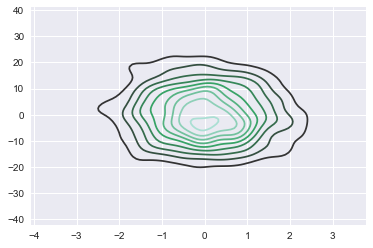

In [30]:
# We can also create kde plots for multidimensional data

mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = pd.DataFrame(dataset2, columns=['X','Y'])

sns.kdeplot(dframe)

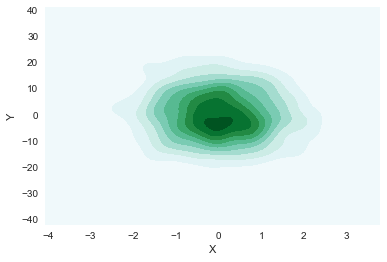

In [33]:
# could have passed two seperate vectors

sns.kdeplot(dframe.X, dframe.Y, shade=True)

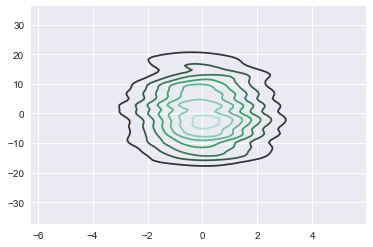

In [34]:
# We can specify bandwidths

sns.kdeplot(dframe, bw=1)

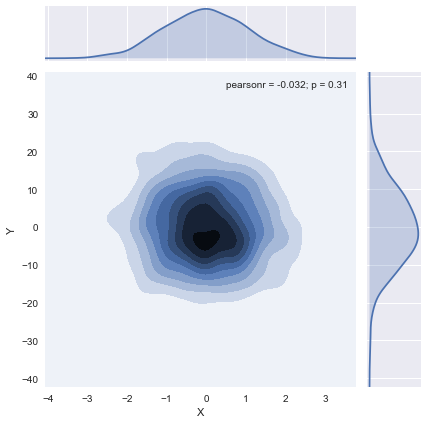

In [36]:
sns.jointplot('X','Y',dframe, kind='kde')